# Using ulmo to display Daymet data for individual locations


Daymet is a a daily gridded weather dataset distributed through the ORNL DAAC https://daymet.ornl.gov/

As part of their tools for obtaining data they have created a webservice that allows one to download a timeseries of temperature and precipitation for any location in the US.


In [1]:
from ulmo.nasa import daymet

In [2]:
ornl_lat, ornl_long = 35.9313167, -84.3104124
df = daymet.get_daymet_singlepixel(longitude=ornl_long, latitude=ornl_lat, 
                                   years=[2012,2013])

### Which gives us a dataframe with daily weather data for the Oak Ridge National Lab

In [3]:
df.head()

,year,yday,prcp,tmax,tmin
2012-01-01,2012,1,3.0,15.0,0.5
2012-01-02,2012,2,2.0,11.5,-3.0
2012-01-03,2012,3,0.0,1.5,-7.0
2012-01-04,2012,4,0.0,3.0,-8.5
2012-01-05,2012,5,0.0,9.5,-5.5


### Which we can visualize using matplotlib and seaborn

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

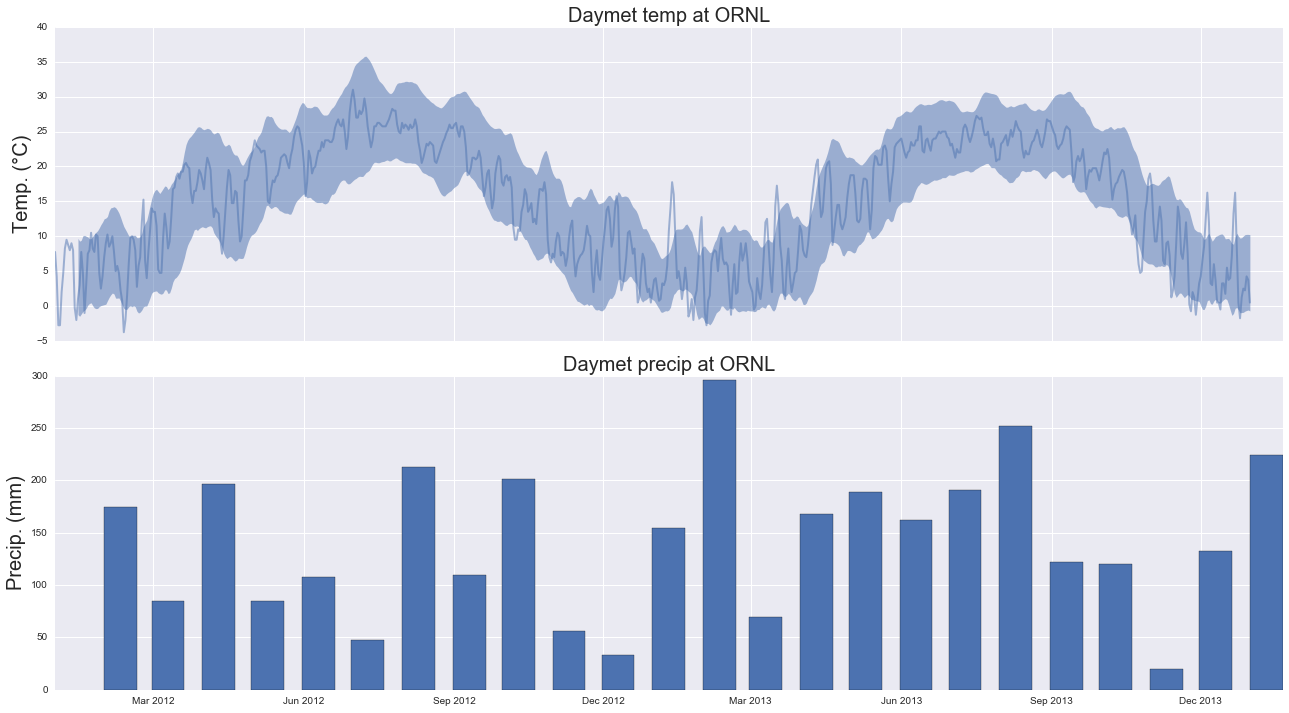

In [5]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2, figsize=(18, 10), sharex=True)
rolling15day = df.rolling(center=False,window=15).mean()
ax1.fill_between(rolling15day.index, rolling15day.tmin, rolling15day.tmax, alpha=0.5, lw=0)
ax1.plot(df.index, df[['tmax', 'tmin']].mean(axis=1), lw=2, alpha=0.5)

ax1.set_title('Daymet temp at ORNL', fontsize=20)
ax1.set_ylabel(u'Temp. (°C)', fontsize=20)

monthlysum = df.resample("M").sum()
ax2.bar(monthlysum.index, monthlysum.prcp, width=20,)
ax2.set_title('Daymet precip at ORNL', fontsize=20)
ax2.set_ylabel(u'Precip. (mm)', fontsize=20)

fig.tight_layout()

### And ask questions such as: "What does the difference in temperature between Denver and Miami look like?"

In [6]:
denver_loc = (-104.9903, 39.7392)
miami_loc = (-80.2089, 25.7753)

denver = daymet.get_daymet_singlepixel(longitude=denver_loc[0], latitude=denver_loc[1], 
                                   years=[2012, 2013, 2014])
miami = daymet.get_daymet_singlepixel(longitude=miami_loc[0], latitude=miami_loc[1], 
                                   years=[2012, 2013, 2014])

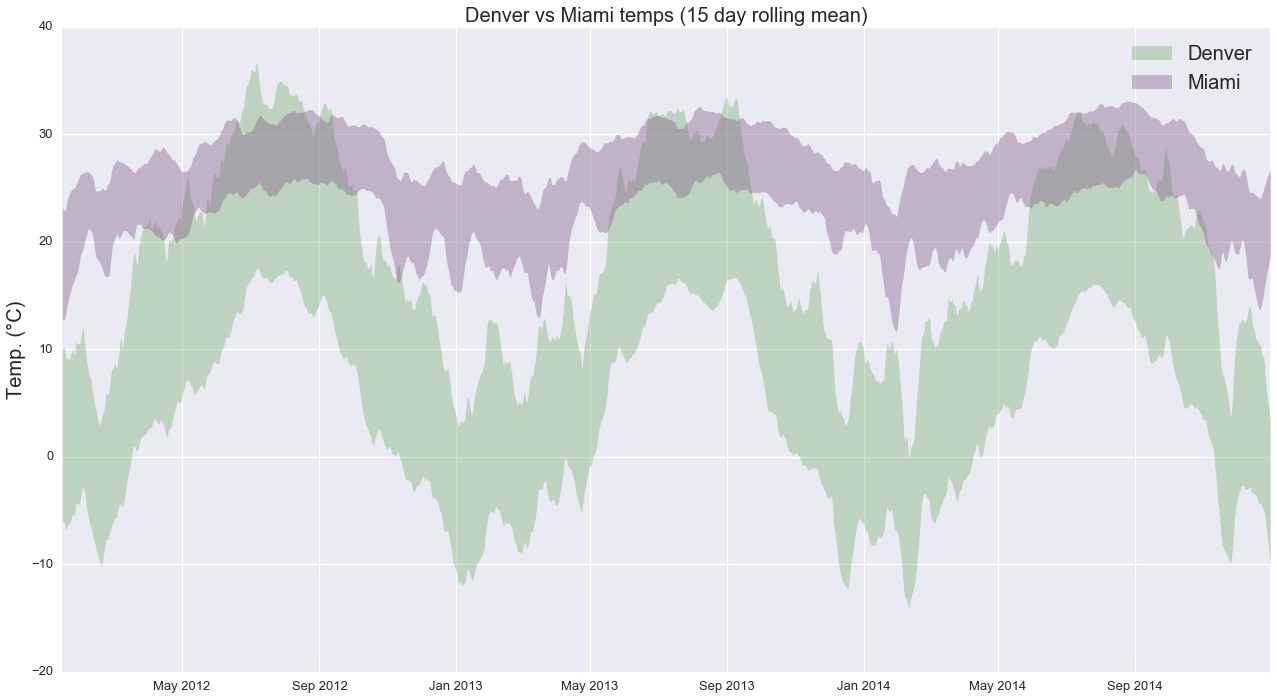

In [9]:
sns.set_context("talk")
fig, ax1 = plt.subplots(1, figsize=(18, 10))
den_15day = denver.rolling(center=False,window=15).mean()
ax1.fill_between(den_15day.index, den_15day.tmin, den_15day.tmax, 
                 alpha=0.4, lw=0, label='Denver', color=sns.xkcd_palette(['faded green'])[0])

ax1.set_title('Denver vs Miami temps (15 day rolling mean)', fontsize=20)

miami_15day = miami.rolling(center=False,window=15).mean()
ax1.fill_between(miami_15day.index, miami_15day.tmin, miami_15day.tmax, 
                 alpha=0.4, lw=0, label='Miami', color=sns.xkcd_palette(['dusty purple'])[0])

ax1.set_ylabel(u'Temp. (°C)', fontsize=20)
fig.tight_layout()
plt.legend(fontsize=20)